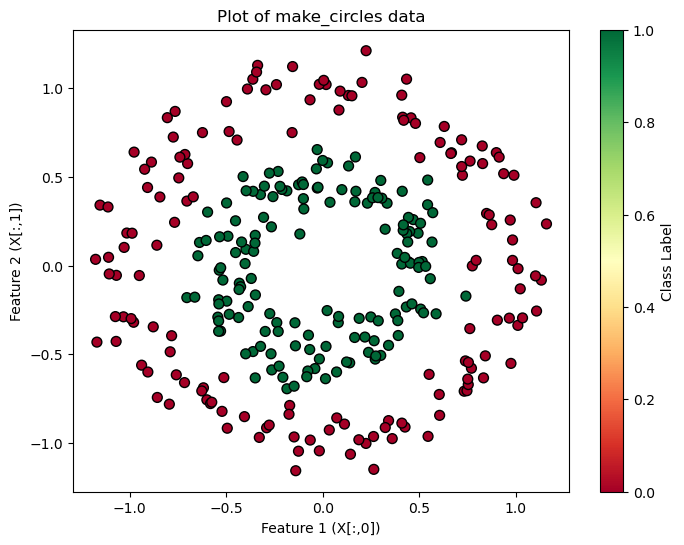

In [34]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

X,y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlGn, edgecolors='k',marker='o', s=50)
plt.xlabel("Feature 1 (X[:,0])")
plt.ylabel("Feature 2 (X[:,1])")
plt.title('Plot of make_circles data')
plt.colorbar(label="Class Label")
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.neural_network import MLPClassifier
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive 



def update_plot(hidden_layer_size):

    X,y = make_circles(n_samples=300, noise=0.1, factor=0.5, random_state=0)


    clf = MLPClassifier(hidden_layer_sizes=(hidden_layer_size),activation='relu', max_iter=3000, random_state=1)
   
    clf.fit(X,y)

    x_vals= np.linspace(X[:,0].min()-0.1, X[:,0].max()+0.1, 100)
    y_vals= np.linspace(X[:,1].min()-0.1, X[:,1].max()+0.1, 100)

    X_plane, Y_plane = np.meshgrid(x_vals, y_vals)

    grid_points = np.column_stack((X_plane.ravel(), Y_plane.ravel()))
    Z = clf.predict(grid_points)
    Z = Z.reshape(X_plane.shape)
    y_pred = clf.predict(X)
    plt.clf()
    plt.contour(X_plane,Y_plane,Z,levels=[-0.5,0.5,1.5],cmap=plt.cm.RdYlGn, alpha=0.6)

    class_0 = y_pred == 0
    class_1 = y_pred == 1



    plt.scatter(X[class_0,0], X[class_0,1], c='red', edgecolors='k', marker='o', s=50, label='Predicted Class 0')
    plt.scatter(X[class_1,0], X[class_1,1], c='green', edgecolors='k', marker='o', s=50, label='Predicted Class 1')
    plt.xlabel("Feature 1 ")
    plt.ylabel("Feature 2 ")
    plt.title(f'Decision Boundary and predicted labels (Hidden Layer Size: {hidden_layer_size})')
    plt.legend()
    plt.show()

hidden_layer_size_slider = widgets.IntSlider(value=1, min=1, max=10, step=1, description='Hidden Layer Size:')
interactive_plot = interactive(update_plot, hidden_layer_size=hidden_layer_size_slider)
display(interactive_plot)



interactive(children=(IntSlider(value=1, description='Hidden Layer Size:', max=10, min=1), Output()), _dom_cla…